In [1]:
###General Code First Box
import pandas as pd
import numpy as np
import scanpy as sc
import magpy as mp
import scipy.stats as stats
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

def sort_list_by_pctexp(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    pctexp = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        pctexp[i] = (subset2.layers['raw_normalized']>0).sum(axis=0).A1 / subset.shape[0]
    subset.var['pctmax'] = pctexp.max(axis=0)
    sorted_list = subset.var['pctmax'].sort_values(ascending=False).index.tolist()
    return sorted_list
def sort_list_by_mean(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[i] = subset2.layers['raw_normalized'].mean(axis=0).A1
    subset.var['cmeans'] = cmeans.max(axis=0)
    sorted_list = subset.var['cmeans'].sort_values(ascending=False).index.tolist()
    return sorted_list
def means_to_df(adata, gene_list, save=None, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = {}
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[cluster] = subset2.layers['raw_normalized'].mean(axis=0).A1
    df = pd.DataFrame(cmeans,index=gene_list)
    if save: df.to_csv(save)
    return df

combined_path = "/proj/magness/CDS010-014-015_combined"

sc.set_figure_params(dpi_save = 300, format = 'svg')
fig_path = combined_path+'fig5-6-MarkerDEGs/'
sc.settings.figdir = fig_path


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



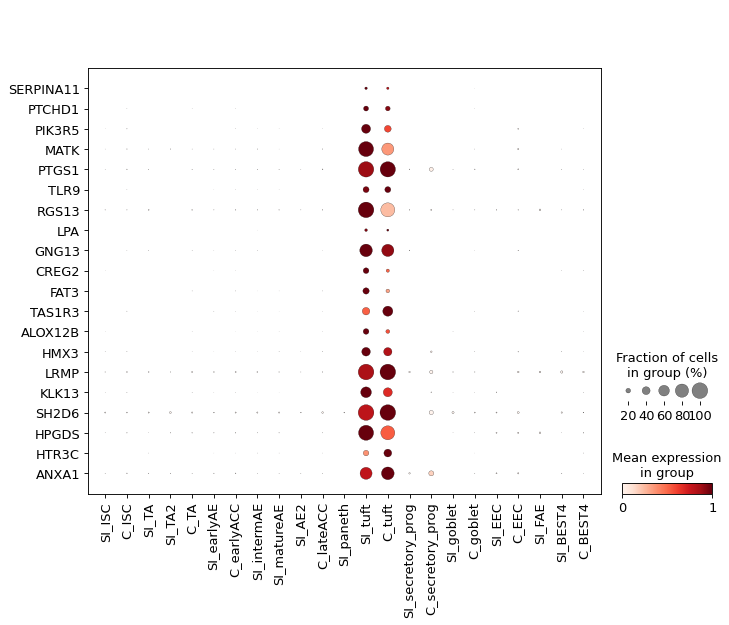

In [2]:
###Figure 5
### Dotplots for each celltype marker DEGs
combined_path = "/proj/magness/CDS010-014-015_combined"
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

gene_list = mp.filter_genes(adata, [
'SERPINA11','PTCHD1','PIK3R5','MATK','PTGS1','TLR9','RGS13','LPA','GNG13','CREG2','FAT3','TAS1R3','ALOX12B','HMX3','LRMP','KLK13','SH2D6','HPGDS','HTR3C','ANXA1'
])

####Records for each cell type
####Switch out gene_list for each lineage and generate each lineage dotplot separately
# ISC:'LGR5',	'GDF15',	'ASCL2',	'RGMB',	'ALDH1B1',	'RARRES2',	'PDZK1IP1',	'RPL5',	'CDK6',	'RNF43',	'RPL12',	'QPRT',	'NOB1',	'RPS3',	'NACA',	'RPL14',	'RPS4X',	'RPS5',	'RPL26',	'RPL3',	'RPL13',	'BTF3',	'RPS10',	'EIF3E',	'RPS14',	'RPL35A',	'RPL29',	'RACK1',	'RPL39',	'RPS9',	'RPS18',	'RPL34',	'RPS3A',	'RPS25',	'RPL18',	'RPS12',	'RPS2',	'RPS6',	'RPS24',	'TOMM20',	'RPL11',	'RPL9',	'RPL24',	'RPS27',	'RPS8',	'RSL1D1',
# TA:'NDC1',	'MCM5',	'MCM8',	'CENPJ',	'GGH',	'HSPD1',	'TOMM40',	'PRKDC',	'LBR',	'WDR90',	'GINS2',	'TELO2',	'TTF2',	'WEE1',	'NOP56',	'PM20D2',	'TMEM238',	'KNTC1',	'NOLC1',	'IDH2',	'AMD1',	'CMSS1',	'CASP8AP2',	'PLP2',	'RCC1',	'SHMT1',	'PRR11',	'NCL',	'HMGN5',	'CACYBP',	'ETFB',	'KIF11',	'NOP58',	'VRK1',	'ANP32E',	'ARL6IP1',	'ENO1',	'NCAPD3',	'PPIH',	'GGCT',	'MCM3',	'MLEC',	'C1QBP',	'NCAPG2',	'HSPA9',	'FBL',	'PA2G4',	'NUDT5',	'TFAM',	'TIMM13',	'C20orf27',	'FIGNL1',	'TCOF1',
# Paneth:'DEFA5',	'ITLN2',	'DEFA6',	'PRSS2',	'PLA2G2A',	'NOTUM',	'REG3A',	'RETNLB',	'AMOT',	'IFI30',	'PSMG1',	'YIPF2',	'FKBP11',
# BEST4:'BEST4','MEIS1','CA7','RHOV','OTOP2','NBPF19','NOTCH2','HES4','NBPF14','ADCY5','ADRA2A','NBPF10','GMNN','CCNYL1','STEAP1','XYLT1','QSOX1','LURAP1L','EXD3','GUCA2A',	'LAMA3',	'GPRC5C',	'NT5E',	'CEACAM6',	'CDK18',	'HES1',	'PHLDA2',	'ATG16L2',	'FKBP1A',	'SNX30',	'RNASET2',	'S100A10',	'NEURL1',	'SLC27A2',	'SDCBP2',
# AE/CC:'CA2','AKR1B10','SLC4A4','PCK1','PFKFB2'
# Goblet:'MUC2',	'SYTL1',	'MLPH',	'MARVELD1',	'ZG16',	'CAPN9',	'BCAS1',	'REP15',	'CAPN8',	'SYTL2',	'GALNT8',	'KCNK6',	'FCGBP',	'SPINK4',	'GALNT5',	'SLC50A1',	'SLC39A11',	'KDELR3',	'ERN2',	'KCNMA1',	'LRRC31',	'TACC1',	'PLA2G10',	'SMIM14',	'RAP1GAP',	'RAB27A',	'TCEA3',	'FAM107B',	'SLC22A23',	'SPDEF',	'CLCA1',	'CDC42EP5',	'CANT1',	'GALNT12',	'PODXL',	'SLC12A8',	'NANS',	'CREB3L1',	'SCNN1A',	'SEL1L3',	'FGFR2',	'MIA3',	'GFPT1',	'SGSM3',	'ATOH1',	'XBP1',	'PRIMPOL',	'MLLT3',	'SH3PXD2A',	'SLC35A1',	'TSPAN13',	'ANO7',	'URAD',	'COG3',	'FRYL',	'TTC39A',	'AGR2',	'GOLGA2',	'TFF3',	'PDIA5',	'CRACR2A',	'MB',	'KDELR2',	'EIF2AK3',	'HERPUD1',	'SLC2A10',	'ERLEC1',	'TPSG1',	'SLC16A7',	'HID1',	'COPB2',	'EDEM3',	'SLC39A7',	'FAM83E',	'WNK4',	'HES2',	'TMED3',	'MUC4',	'SEC16A',	'ERGIC1',	'TAGLN',	'SLC30A7',	'MCF2L',	'PGM3',	'SEC24D',	'SLC9A3R2',	'GALNT7',	'ARFGAP1',	'FOXA3',	'DNAJC10',	'SSR3',	'PLXDC2',	'USO1',	'FAM174B',	'GOLGB1',	'KLF4',	'TMEM214',	'ST6GALNAC1',	'ENTPD8',	'LARP1B',	'GNE',	'PTGER4',	'B4GALT4',	'GMPPB',	'ARL1',	'MXD4',	'DHX32',	'CREB3L4',	'GORASP2',	'C3orf52',	'BLCAP',	'HDLBP',	'TM9SF3',	'PMM2',	'AL390719.2',	'FAM110C',	'LMAN1',	'TMEM184A',
# Tuft:'SERPINA11','PTCHD1','PIK3R5','MATK','PTGS1','TLR9','RGS13','LPA','GNG13','CREG2','FAT3','TAS1R3','ALOX12B','HMX3','LRMP','KLK13','SH2D6','HPGDS','HTR3C','ANXA1',	'BMX',	'PLCB2',	'KLHDC7A',	'DKK3',	'LINC02576',	'PSTPIP2',	'NCAM1',	'TRPM5',	'CMYA5',	'AVIL',	'NCMAP',	'HCK',	'ALOX5AP',	'DCLK2',	'KCNQ4',	'AC079447.1',	'TANC2',	'SH2D7',	'CSMD1',	'GFI1B',	'FLI1',	'GRIN2B',	'NRG2',	'C11orf53',	'FYB1',	'OGDHL',	'FCRL2',	'HOTAIRM1',	'DEFB1',	'ST6GALNAC3',	'VAV1',	'SDC2',	'PTPN18',	'PREX1',	'HOXA1',	'AZGP1',	'AFAP1L2',	'FAM122C',	'CORO2B',	'BCAM',	'CCDC69',	'RUNX2',	'KIT',	'LY6H',	'GAS7',	'RAC2',	'SPTLC2',	'POU2F3',	'PYGL',	'IL17RB',	'PRNP',	'GRK5',	'GRASP',	'ZFHX3',	'HMCES',	'GJC3',	'INPP5D',	'PITPNC1',	'RASGRF2',	'LIPG',	'CCSER1',	'RUNX1',	'UNC5B',	'CD37',	'SKAP2',	'KREMEN2',	'LYL1',	'ZNF280B',	'ALOX5',	'LRRC56',	'GPR89A',	'FAM49A',	'SNRNP27',	'PRKAR2B',	'SUCNR1',	'COL27A1',	'TPM2',	'FURIN',	'CD14',	'KRT2',	'LIMD1',	'PLCG2',	'LINC01091',	'SLC1A4',	'TRHDE',	'THOC5',	'LTC4S',	'CREG1',	'PART1',	'HOXA3',	'PTPRJ',	'GPT2',	'PDE4D',	'IL13RA1',	'ADGRG6',	'EIF1B',	'FES',	'MEGF9',	'RBM38',	'MYO1B',	'TUBG2',	'EPB41L1',	'OBSL1',	'PBXIP1',	'RGL1',	'ORAI2',	'SLC6A14',	'BIK',	'TLE4',	'CNP',	'ANXA4',	'CKLF',	'SEC14L1',	'CLEC2D',	'INPP5B',	'CGNL1',	'VWA1',	'C19orf57',	'ASMTL',	'WIPF1',	'KMT2C',	'ATP2A3',	'SNX9',	'SLCO4A1-AS1',	'PRDX4',	'GPSM3',	'STK38',	'TPM1',	'AP001816.1',	'AOC1',	'HCCS',	'IMP4',	'ELOVL7',	'CSK',	'JMY',	'PAQR4',	'CCDC115',	'IL27RA',	'NRGN',	'TMEM9',	'IFT27',	'CSF1',	'ABCB9',	'APH1B',	'TMEM176B',	'MYZAP',	'MARCKSL1',	'HSPA4L',	'TMEM176A',	'NEIL2',	'RASSF6',	'IFI6',	'SMYD3',	'ITPR2',	'KRT18',	'ACSL4',	'LMCD1',	'RHOBTB1',	'RALGPS2',	'GDPD5',	'PELI2',	'SUPT3H',	'RSAD1',	'RAB37',	'ALMS1',	'GANC',	'PTPN6',	'GCOM1',	'RHOG',	'RNF144B',	'HOMER1',	'TMEM198',	'IFT172',	'STAT1',	'PSMD9',	'MTA3',	'SHROOM2',	'NRTN',	'RIMKLB',	'HLA-E',	'AP006284.1',	'CMTM7',	'IGSF8',	'ORC2',	'PMM1',	'COL9A3',	'GPR89B',	'LHPP',	'KIAA1217',	'SOX9',	'ARHGEF2',	'SIRPA',	'CCDC92',	'USP18',	'TPBG',	'SPAG9',	'CDCP1',	'TOR3A',	'CAMK2D',	'MTSS1',	'GAB2',	'RAB12',	'ARHGEF11',	'CXXC5',	'FAM217B',	'SHB',	'LZTS2',	'BTBD8',	'CCDC107',	'PEAK1',	'ZNF618',	'DCP2',	'GADD45A',	'SOX13',	'CHN2',	'CUL3',	'PLPP2',	'LYPLA1',	'MTIF3',	'MSI2',	'ARHGEF35',	'BIN3',	'DAPK1',	'INPP4A',	'ABHD2',	'MBNL3',	'CTSC',	'EPS15L1',	'RCAN1',	'EIF5',	'SPTLC3',	'BMT2',	'KDM4A',	'NT5C',	'LINC00920',	'ORMDL1',	'RAB4A',	'MGAT5',	'RNF14',	'COBLL1',	'SRCIN1',	'CALM2',	'ITM2C',	'REEP5',	'MISP3',	'ARRDC3',	'BUB3',	'STRN3',	'IGSF3',	'WDFY3',	'CSTB',	'MRPS21',	'CLRN3',	'NCK2',	'TCF7',	'FKBP9',	'MAP7',	'USP28',	'POC1B',	'TPD52L1',	'BBX',	'MIR200CHG',	'RAB20',	'DDX58',	'RNF24',	'IFITM2',	'SAYSD1',	'PPP1R3D',	'MPRIP',	'LUC7L3',	'RICTOR',	'HK1',	'LRRC8B',	'PRSS3',	'SORT1',	'CC2D1A',	'TWF2',	'HLA-B',	'EPDR1',	'MAX',	'TMEM74B',	'CARMIL1',	'FRY',	'TIMP1',	'GLG1',	'C1GALT1C1',	'NQO1',	'SLC2A4RG',	'ANLN',	'KRT8',	'TMEM170A',	'CLIC5',	'ITFG1',	'SPATS2L',	'DPYSL2',	'PPDPF',	'LPAR2',	'TMEM191B',	'ASRGL1',	'GNAI2',	'SPRY1',	'SERP2',	'CNN3',	'HLA-C',	'PSAT1',	'KCNQ1',	'TMEM30A',	'TSC22D4',	'KBTBD2',	'KALRN',	'C1RL',	'NRCAM',	'HSBP1L1',	'ORAI3',	'IFI35',	'SLCO3A1',	'MIR29B2CHG',	'CASP6',	'MID1',	'TMEM131L',	'FAM126B',	'TMED1',	'AGRN',	'TTTY14',	'PPP2R5C',	'APP',	'ATF7IP2',	'PDLIM5',	'H1FX',	'TK2',	'PLEKHB1',	'GLCE',	'PCMTD1',	'ALAS1',	'CENPV',	'CHD9',	'MAP1LC3B',	'DAD1',	'PTPRE',	'RTN4',	'PCP4',	'ADH6',	'TRAK1',	'ATXN1',	'HEXA',	'HEPACAM2',	'KLK11',	'ZMIZ1',	'AC027644.3',	'ANKMY2',	'MSRB2',	'GALNT2',	'FUT6',	'LINC01003',	'TMEM65',	'TOR1AIP1',	'IPMK',	'PAWR',	'SKP1',	'DSG2',	'FEM1B',	'LINC01089',	'AKIRIN2',	'GMPR',	'ZDHHC3',	'CMTM6',	'VPS28',	'ANXA13',	'FGGY',	'TRIR',	'TMEM248',	'PPP2R2A',	'MECP2',	'TEX264',	'C1orf198',	'MTREX',	'EHF',	'ITGB5',	'RTKN',	'WASL',	'VPS8',	'CCM2',	'B2M',	'PTPN2',	'PPP3CA',	'USP14',	'S100A4',	'ZBTB44',	'DUSP6',	'ZNF428',	'CLMN',	'CLCN3',	'TMEM87A',	'ZMYND8',	'CRIP1',	'SDF2',	'COPRS',	'HDAC1',	'CHMP2A',	'CCDC28B',	'USP3',	'DIXDC1',	'MBD4',	'CHM',	'CAPN12',	'RAB4B',	'HLA-A',	'DNAJB6',	'FBXO32',	'PDHB',	'ECH1',	'CAPZA2',	'SMIM3',	'CMTM8',	'EFHC1',	'CHPF',	'ALDH2',	'LEPROT',	'ESPN',	'CDC37L1',	'USH1C',	'ISG15',	'SESN1',	'MAP4K4',	'HIST1H2AC',	'STAU1',	'ADA2',	'RBM18',	'ARPC5',	'H2AFJ',	'RARA-AS1',	'MFSD6',	'ABI2',	'CAMTA2',	'RNF217',	'RASSF3',	'PSMB9',	'C1orf56',	'KANSL1',	'POLR2J',	'PTP4A2',	'WBP2',	'SDCBP',	'WDR1',	'ACTN1',	'PSAP',	'RHBDD2',	'CDC42SE1',	'RTF2',	'YPEL3',	'MTMR12',	'WSB1',	'MAFF',	'IRF1',	'TAPBPL',	'TET2',	'ARHGEF16',	'VAPA',	'PSME1',	'NDUFC2',	'MAT2A',	'GGCX',	'MMP24OS',	'CYB5R3',	'CTSB',	'SVIP',	'CLDN12',	'SPINT1-AS1',	'TBC1D2B',	'LACTB',	'BLOC1S4',	'IP6K2',	'N4BP2L2',	'ADAP1',	'KREMEN1',	'UNC50',	'PRPSAP1',	'MYL6',	'ZRSR2',	'HIP1R',	'NEURL1B',	'ZRANB1',	'SIGIRR',	'B3GAT3',	'ARGLU1',	'HMOX1',	'TMEM59',	'CHD6',	'UBB',	'SLC25A13',	'SRGAP2',	'MCRIP1',	'F11R',	'ZBTB8OS',	'RABGAP1L',	'ACTB',	'FCHO2',	'ZNF483',	'CCND3',	'TAF7',	'PAFAH1B1',	'RP9',	'FAM171A1',	'PHC1',	'OAZ2',	'NEK6',	'FGFR4',	'CLK3',	'COX17',	'BLM',	'GDPD1',	'COX20',	'RBM8A',	'DCPS',	'MIEN1',	'TMEM179B',	'PHKB',	'LAPTM4A',	'ZNF430',	'UGT8',	'LASP1',	'RNF5',	'KRT7',	'PGK1',	'OAZ1',	'NCOR1',	'EMP3',	'RSRC2',	'LITAF',	'GPR137B',	'PPP1R11',	'GTF2B',	'TM2D1',	'SNX14',	'TGOLN2',	'UBE2H',	'CIRBP',	'TTC1',	'IFI27L2',	'DDX5',	'ARHGAP12',	'NECAP1',	'ARHGEF38',	'SPCS2',	'GRK6',	'IFT43',	'CGGBP1',	'LNX1',	'TAX1BP1',	'MALAT1',	'OSGIN2',	'NFATC3',	'TRAM2',	'PRKCD',	'MACC1',	'DYNLT1',	'PRMT2',	'FDFT1',	'PPM1H',	'CSRP1',	'PLA2G4A',	'HEBP2',	'CSNK1A1',	'RGL2',	'MGAM2',	'ARL8A',	'SLC4A2',	'DHRSX',	'LINC00685',	'GMCL1',	'YPEL2',	'VPS26A',	'CDC42',	'RHOA',	'MAP4K3',	'ACTR8',	'HIST1H1C',	'TMCO1',	'TCEA1',	'EPHA4',	'RASSF7',	'TMEM63A',	'IGF2R',	'CDK19',	'PRR34-AS1',	'RAE1',	'ATP6V1E1',	'SELENOT',	'PCCB',	'ZNF226',	'CDC5L',

# EEC:'MARCH4'	'CHGA',	'CHGB',	'SCG2',	'STXBP5L',	'SCGN',	'CRYBA2',	'PYY',	'SLC26A7',	'TPH1',	'RAB3C',	'PAX6',	'CPLX2',	'UCN3',	'SCT',	'AC024610.2',	'TTR',	'ARX',	'ABCC8',	'AMER3',	'C3orf80',	'RUNX1T1',	'RUNDC3A',	'GNG2',	'ETV1',	'IGFBP3',	'CPE',	'PAX4',	'CACNA1A',	'CNIH2',	'SCG5',	'TSPAN2',	'UNC13A',	'GPBAR1',	'KCNMB2',	'RIIAD1',	'KIF5C',	'CDHR3',	'AC022893.2',	'GNAO1',	'SSTR2',	'KCNB2',	'KCNK3',	'BAIAP3',	'SLC38A11',	'CELF3',	'PCSK1N',	'NPW',	'VWA5B2',	'SLC29A4',	'LINC00907',	'BCAS4',	'PAM',	'NKX2-2',	'QDPR',	'GCH1',	'VSTM2L',	'SPATC1L',	'F10',	'C12orf75',	'C9orf16',	'CXXC4',	'RFX3',	'DDC',	'INSM1',	'C7',	'RGS2',	'TRMT9B',	'NISCH',	'GCLM',	'RAP1GAP2',	'SYT13',	'ISYNA1',	'AL133325.3',	'ASGR1',	'METRN',	'CACNA2D1',	'OTULINL',	'MYL6B',	'BEX3',	'FOXA1',	'BEX2',	'TRNP1',	'ELL2',	'VPS13A',	'QPCT',	'PKM',	'MS4A8',	'GNAS',	'GUCY2C',	'COX7A2L',	'ARFGEF3',	'SNRPN',	'UCP2',	'SLC8A1',	'SEC11C',	'VEGFB',	'RNASEH2C',	'PTMS',	'CDKN1C',	'ERI3',	'POLR2L',	'HMGN3',	'MDK',

adata = mp.scale_adata(adata, groupby = 'lineage')
sc.pl.dotplot(adata, var_names=gene_list, groupby = 'lineage', swap_axes=True, layer = 'raw_scaled')#, save = 'Tuft_Top20')
